# **Task 5: Strategy Backtesting**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Download TSLA data
df = yf.download("TSLA", start="2015-07-01", end="2025-07-31")
prices = df['Close']
# 2. Calculate short and long moving averages
short_window = 20
long_window = 50

[*********************100%***********************]  1 of 1 completed


In [2]:
df['MA20'] = prices.rolling(window=short_window).mean()
df['MA50'] = prices.rolling(window=long_window).mean()

In [3]:
# 3. Generate trading signals
df['Signal'] = 0
df.loc[df['MA20'] > df['MA50'], 'Signal'] = 1

# 4. Calculate daily returns and strategy returns
df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Returns'] * df['Signal'].shift(1)

Market Performance Metrics:
Cumulative Return: 1678.04%
Annualized Return: 46.07%
Annualized Volatility: 59.19%
Sharpe Ratio: 77.83%
Max Drawdown: -73.63%

Strategy Performance Metrics:
Cumulative Return: 384.25%
Annualized Return: 24.74%
Annualized Volatility: 42.56%
Sharpe Ratio: 58.13%
Max Drawdown: -60.63%


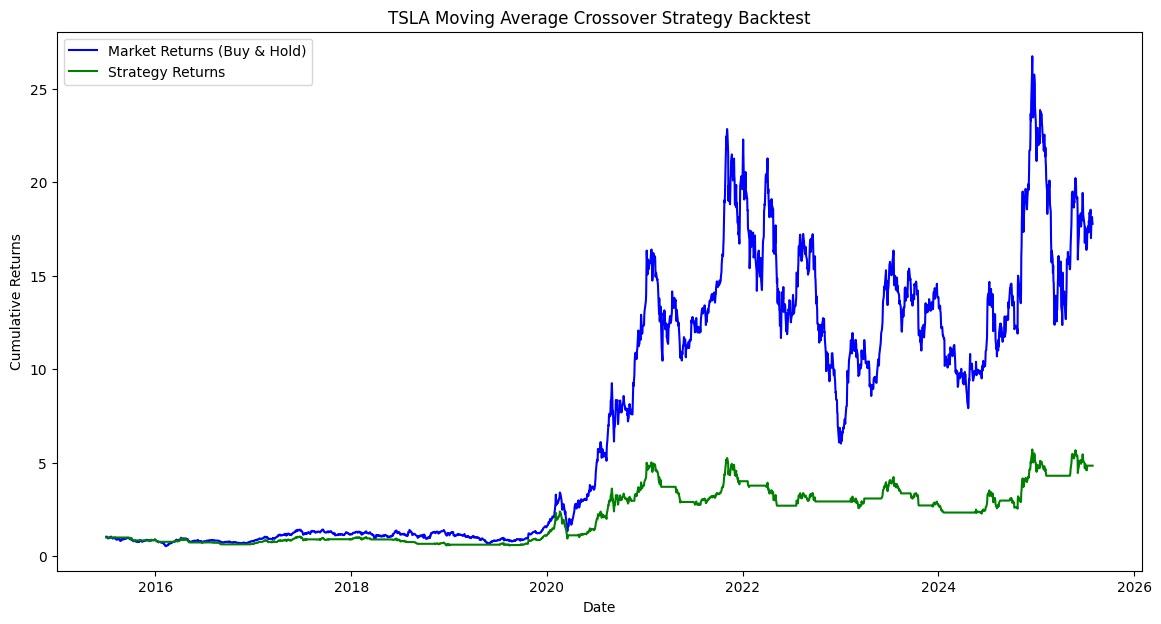

In [4]:
# 5. Calculate cumulative returns
df['Cumulative_Market'] = (1 + df['Returns']).cumprod()
df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()

# 6. Performance metrics function
def performance_metrics(returns, perids_per_year=252):
    cumulative_return = (1 + returns).prod() - 1
    annualized_return = returns.mean() * periods_per_year
    annualized_vol = returns.std() * np.sqrt(periods_per_year)
    sharpe_ratio = annualized_return / annualized_vol if annualized_vol != 0 else np.nan
    # Max drawdown
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.cummax()
    drawdown = cum_returns / rolling_max - 1
    max_drawdown = drawdown.min()
    return {
        'Cumulative Return': cumulative_return,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_vol,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

# 7. Calculate metrics
market_metrics = performance_metrics(df['Returns'].dropna())
strategy_metrics = performance_metrics(df['Strategy_Returns'].dropna())

print("Market Performance Metrics:")
for k, v in market_metrics.items():
    print(f"{k}: {v:.2%}")

print("\nStrategy Performance Metrics:")
for k, v in strategy_metrics.items():
    print(f"{k}: {v:.2%}")

# 8. Plot cumulative returns
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Cumulative_Market'], label='Market Returns (Buy & Hold)', color='blue')
plt.plot(df.index, df['Cumulative_Strategy'], label='Strategy Returns', color='green')
plt.title('TSLA Moving Average Crossover Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [6]:
data = pd.DataFrame({
    'Cumulative Market': df['Cumulative_Market'],
    'Cumulative Strategy': df['Cumulative_Strategy']
})
data.head()

,Cumulative Market,Cumulative Strategy
Date,,
2015-07-01,NaN,NaN
2015-07-02,1.040386,1.0
2015-07-06,1.039272,1.0
2015-07-07,0.995282,1.0
2015-07-08,0.947279,1.0


In [14]:
metrics = performance_metrics(returns=df['Strategy_Returns'])
# Convert dict to DataFrame with one row
metrics_df = pd.DataFrame([metrics])
display(metrics_df)

,Cumulative Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown
0,3.842514,0.247396,0.425563,0.581338,-0.606265


[*********************100%***********************]  1 of 1 completed


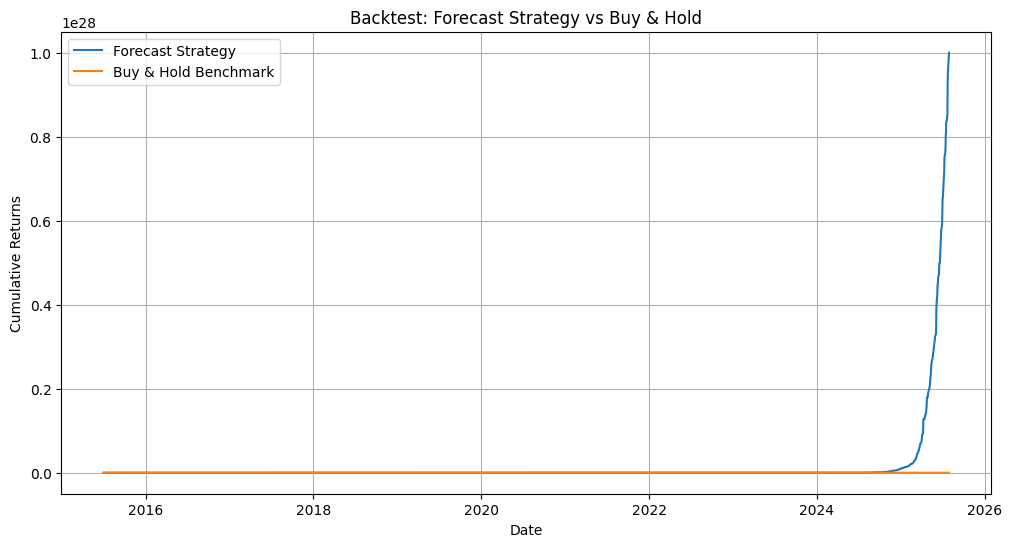

Total return from Forecast Strategy: 994182465002038228653675905024.00%
Total return from Buy & Hold: 1678.04%


In [21]:
# Create a simple "forecast" signal
# For illustration: let's say forecast = +1 (buy) if tomorrow's return > 0, else -1 (sell)
# Download historical price data (example: TSLA)
data = yf.download("TSLA", start="2015-07-01", end="2025-07-31")
data = data[['Close']].copy()
data['Return'] = data['Close'].pct_change().shift(-1)  # next day's return
data['Forecast'] = np.where(data['Return'] > 0, 1, -1)

# Backtest your strategy:
# On each day, go long (buy) if Forecast == 1, short (sell) if Forecast == -1, hold position daily.
# Calculate strategy daily returns = Forecast * daily returns

data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Forecast'].shift(1) * data['Daily_Return']  # Use yesterday's forecast to trade today

# Calculate cumulative returns for strategy and buy & hold benchmark
data['Cumulative_Strategy'] = (1 + data['Strategy_Return']).cumprod()
data['Cumulative_BuyHold'] = (1 + data['Daily_Return']).cumprod()

# Plot the performance
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Strategy'], label='Forecast Strategy')
plt.plot(data.index, data['Cumulative_BuyHold'], label='Buy & Hold Benchmark')
plt.title('Backtest: Forecast Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics
total_strategy_return = data['Cumulative_Strategy'][-2] - 1  # -2 to avoid last NaN from shift
total_benchmark_return = data['Cumulative_BuyHold'][-1] - 1

print(f"Total return from Forecast Strategy: {total_strategy_return:.2%}")
print(f"Total return from Buy & Hold: {total_benchmark_return:.2%}")